In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playstore-analysis/googleplaystore.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
df = pd.read_csv("../input/playstore-analysis/googleplaystore.csv")

In [4]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
df.shape

(10840, 13)

In [6]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### **Data Cleaning**

In [8]:
#dropping rows with null values
df.dropna(how='any',inplace=True)

In [9]:
df['Reviews'] = df['Reviews'].astype(int)

In [10]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [12]:
def Kb_to_Mb(size):
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('k'):
        return float(size[:-1])/1000
    else:
        return size

In [13]:
df['Size'] = df['Size'].apply(lambda x: Kb_to_Mb(x))

In [14]:
df['Size'].value_counts()

Varies with device    1637
14.0                   165
12.0                   161
11.0                   159
15.0                   159
                      ... 
0.516                    1
0.473                    1
0.208                    1
0.246                    1
0.556                    1
Name: Size, Length: 412, dtype: int64

In [15]:
df['Size'].fillna(method="bfill",inplace=True)

In [16]:
df['Size'].replace({'Varies with device':11.0},inplace=True)

In [17]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [18]:
df.rename(columns={'Size_MB':'Size_MB'},inplace=True)

In [19]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [20]:
df["Installs"] = df['Installs'].str[:-1]

In [21]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(",",""))

In [22]:
df['Installs'] = df['Installs'].astype(int)

In [23]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [24]:
df['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [25]:
df['Price'] = df['Price'].apply(lambda x: x if x == '0' else x[1:])

In [26]:
df.Price= df.Price.astype(float)

In [27]:
df.rename(columns={'Price':'Price_in_$'},inplace=True)

In [28]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price_in_$,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [29]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [30]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [31]:
df['Current Ver'].value_counts()

Varies with device      1415
1                        476
1.1                      205
1.2                      133
2                        129
                        ... 
2.3.8.6                    1
12.04.18                   1
32                         1
7.3.2                      1
1.60.0.31354-release       1
Name: Current Ver, Length: 2594, dtype: int64

In [32]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [33]:
def update_version(version):
    if version.endswith('up'):
        ver = version.split(' ')
        ver = ver[0]
        return ver
    elif version == "Varies with device":
        ver = '4.1.0'
        return str(ver)
    else:
        ver = version.split('-')
        ver = ver[0]
        return str(ver)
        

In [34]:
df['Android Ver'] = df['Android Ver'].apply(lambda x: update_version(x))

In [35]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price_in_$,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4


In [36]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

* ### **Exploratory Data Analysis and Visualization**

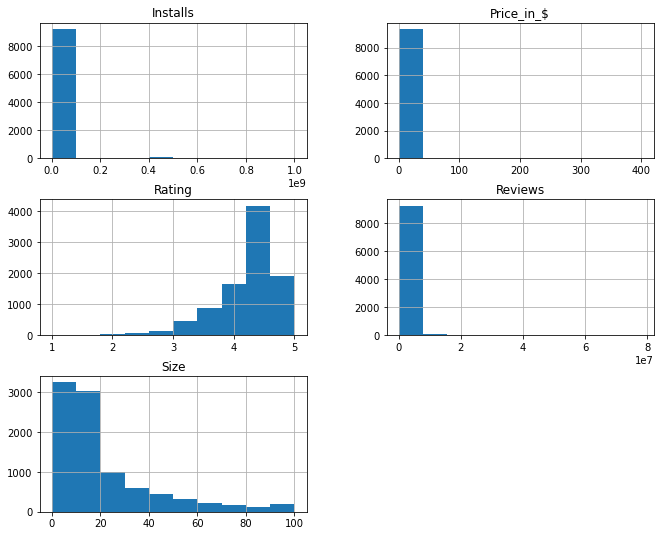

In [37]:
plt.rcParams['figure.figsize'] = (11,9)
df.hist()
plt.show()

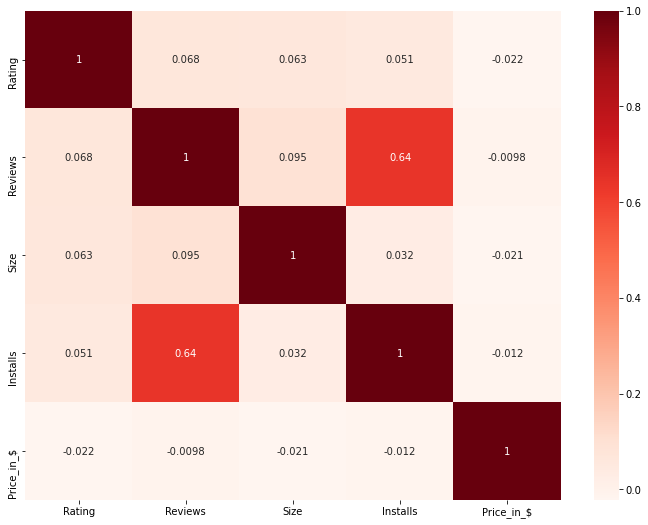

In [38]:
#correlation between variables
plt.rcParams['figure.figsize'] = (12,9)
sns.heatmap(df.corr(),annot=True,cmap="Reds")
plt.show()

In [39]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price_in_$,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4


**App with highest Reviews and Installs**

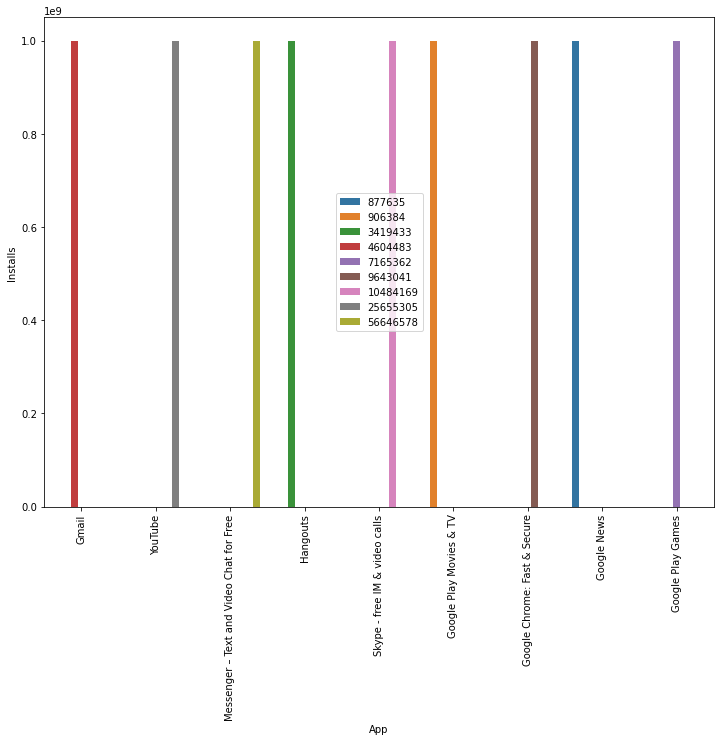

In [40]:
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(x='App',y='Installs',hue='Reviews',data = df.sort_values('Installs',ascending=False)[:10])
plt.legend(loc='center')
plt.xticks(rotation=90)
plt.show()

**App with Highest Ratings**

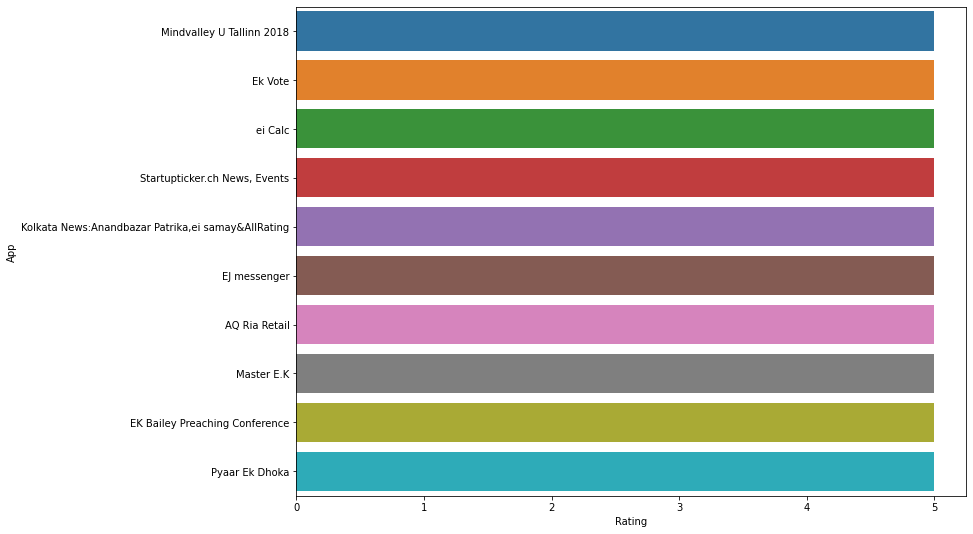

In [41]:
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(x='Rating',y='App',data = df.sort_values('Rating',ascending=False)[:10])
plt.show()

**Category of App with Highest ratings**

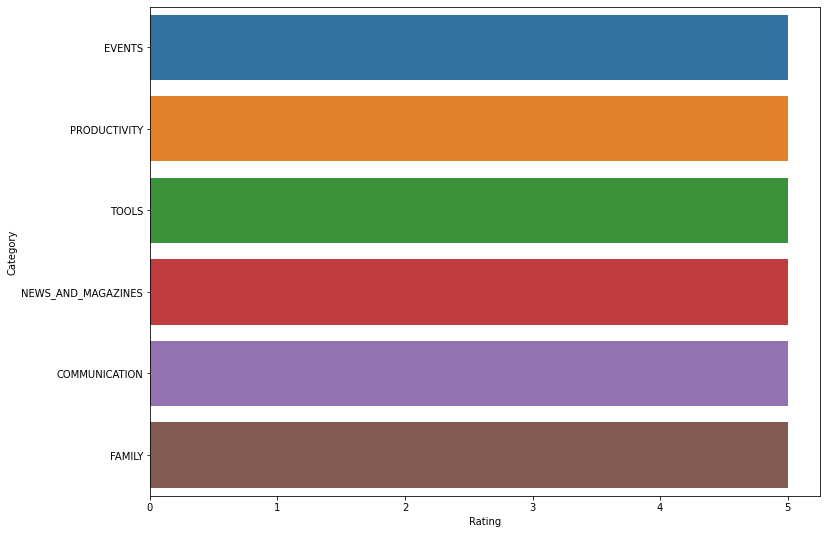

In [42]:
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(x='Rating',y='Category',data = df.sort_values('Rating',ascending=False)[:10])
plt.show()

We can see that the Rating does not depend solely upon Category and Name of the App

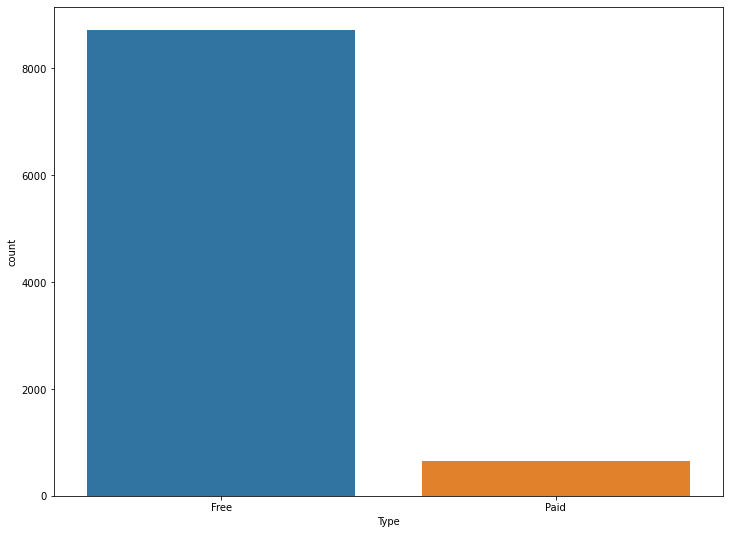

In [43]:
plt.rcParams['figure.figsize'] = (12,9)
sns.countplot(x=df['Type'],data = df)
plt.show()

**Which Category Apps are free and which one are Paid**

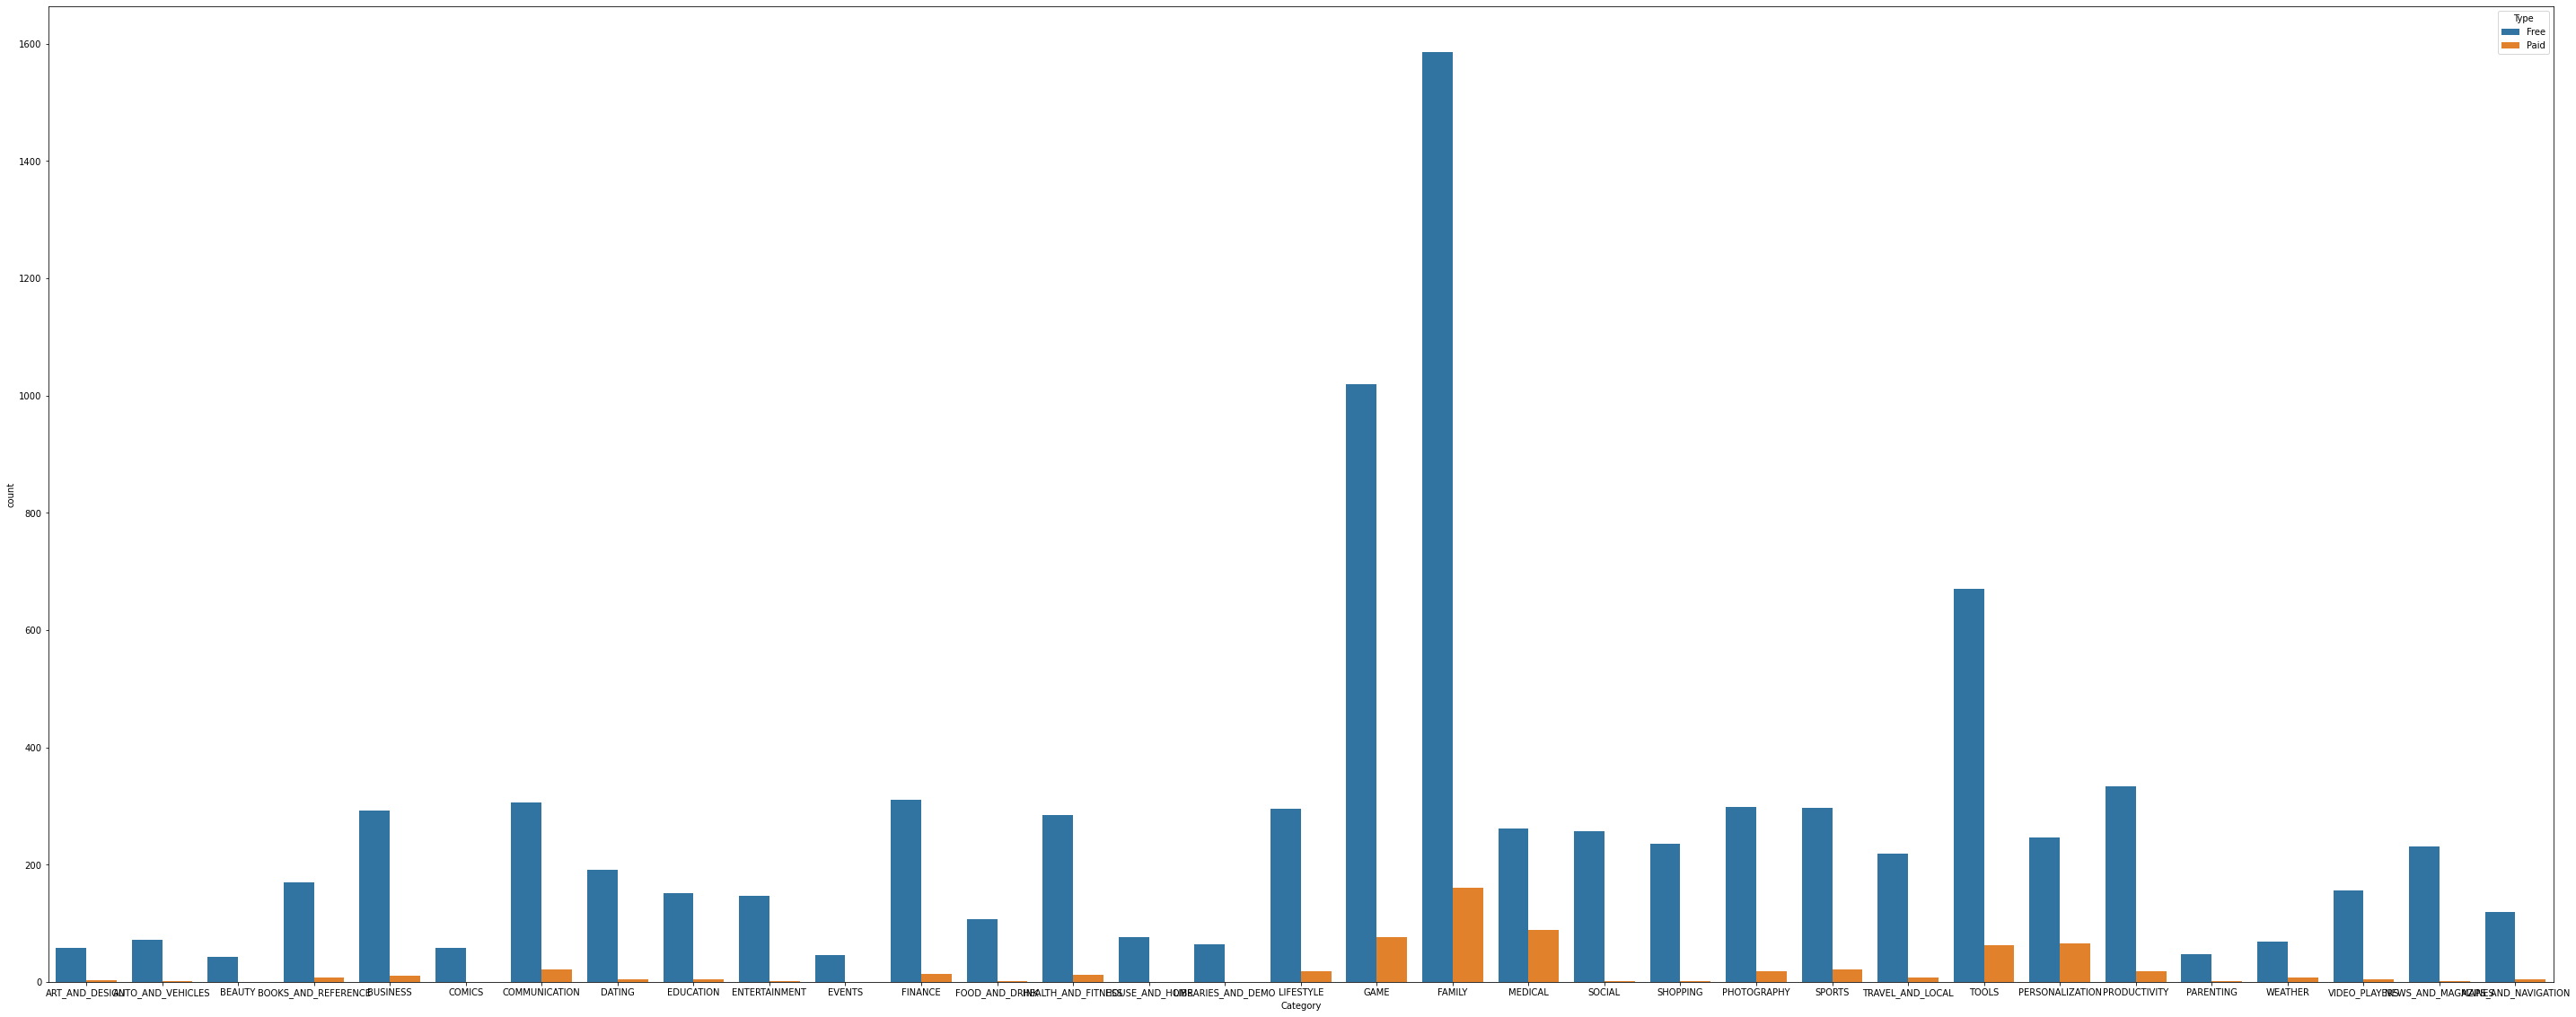

In [44]:
plt.rcParams['figure.figsize'] = (50,20)
sns.countplot(x=df['Category'],hue='Type',data = df)
plt.show()

**App with Most number of installs**

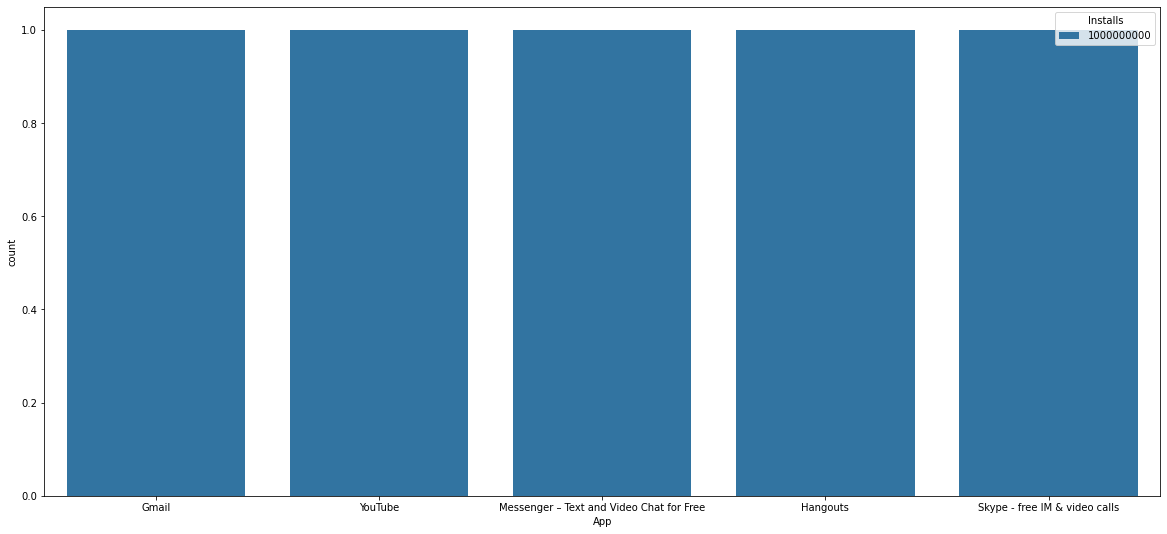

In [45]:
plt.rcParams['figure.figsize'] = (20,9)
sns.countplot(x='App',hue='Installs',data = df.sort_values('Installs',ascending=False)[:5])
plt.show()

Highest Paid apps

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


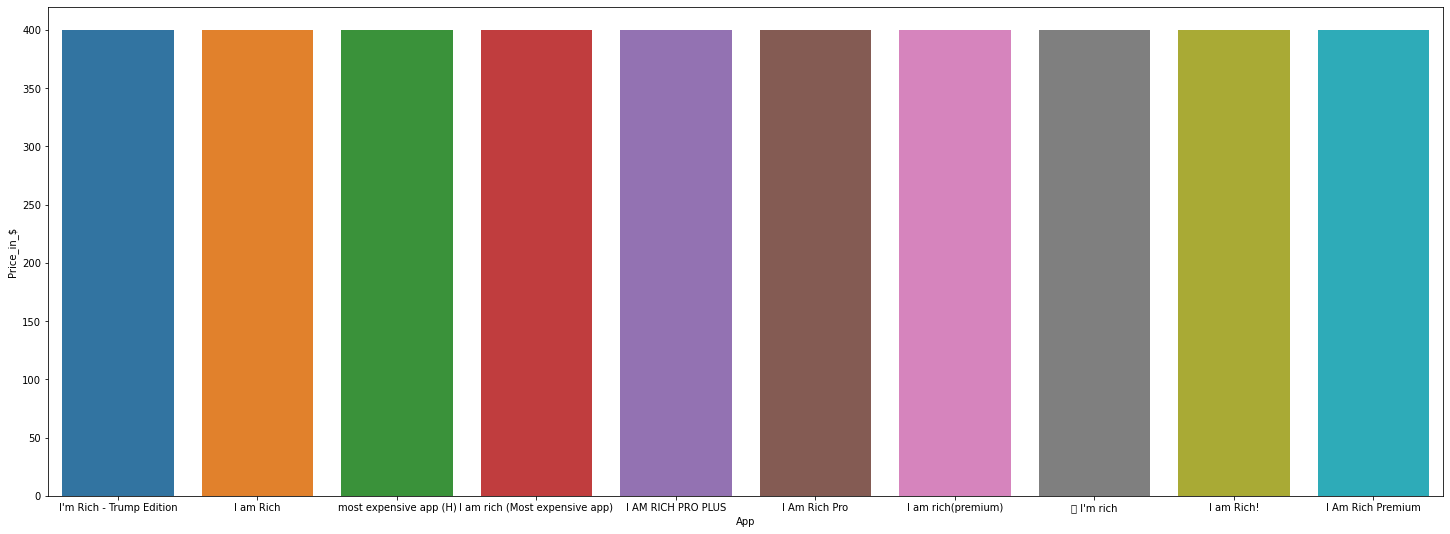

In [46]:
plt.rcParams['figure.figsize'] = (25,9)
sns.barplot(x='App',y='Price_in_$',data = df.sort_values('Price_in_$',ascending=False)[:10])
plt.show()

**Which category Apps are most installed by People**

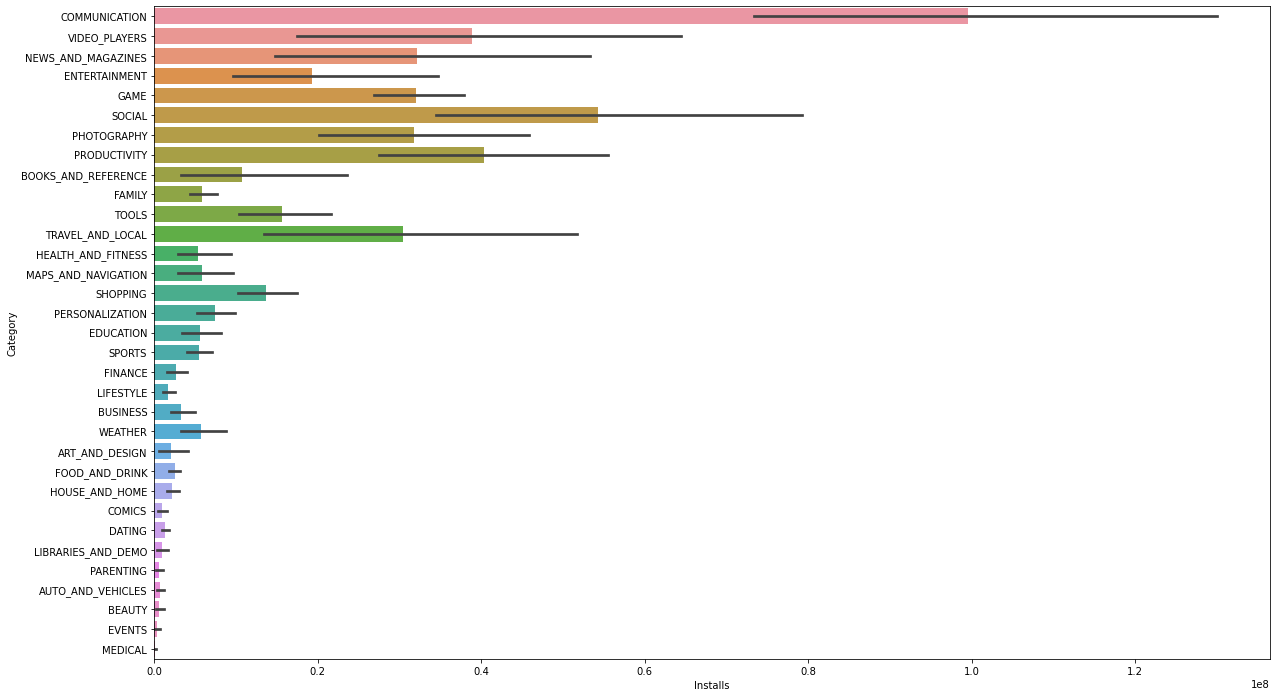

In [47]:
plt.rcParams['figure.figsize'] = (20,12)
sns.barplot(x='Installs',y='Category',data = df.sort_values('Installs',ascending=False))
plt.show()

### **Feature Selection**

In [48]:
df.columns

Index(['Rating', 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price_in_$', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [49]:
x = df[['Reviews','Size','Installs','Price_in_$']]
y = df[['Rating']]

**Feature Importance**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.47063983 0.37164652 0.11389318 0.04382048]


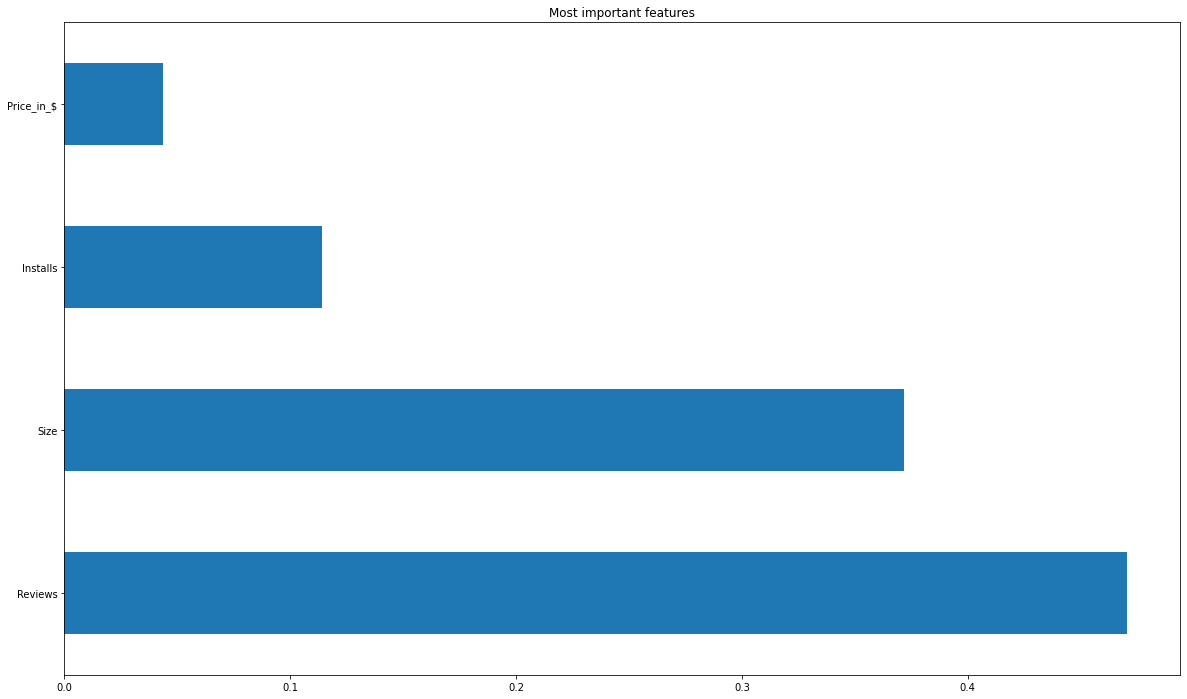

In [50]:
bstfeatures = ExtraTreesRegressor()
fit = bstfeatures.fit(x,y)
print(fit.feature_importances_)
feat_imp = pd.Series(bstfeatures.feature_importances_,index=x.columns)
feat_imp.plot(kind='barh')
plt.title("Most important features")
plt.show()

Hence from above we can see that Reviews contribute  more to the Ratings of the App